In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import numpy as np
import numpy.matlib

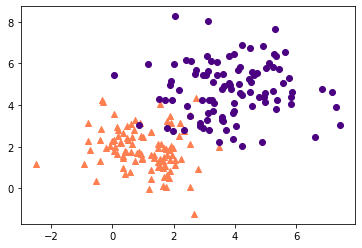

In [17]:
num_points = 100

mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='coral')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = 'o', color='indigo')

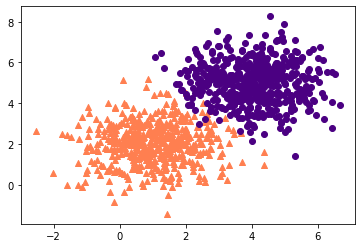

In [18]:
#Validation points
v_n = 500 # N of samples in a class
v_class1 = np.matlib.repmat(mean_1,v_n,1) + np.random.randn(v_n,len(mean_1))
v_class2 = np.matlib.repmat(mean_2, v_n,1)+ np.random.randn(v_n,len(mean_2))
v_D = np.append(v_class1,v_class2,axis =0)
v_Data = np.concatenate((v_D, np.ones((2*v_n,1))),axis = 1).T
v_label = np.concatenate((np.ones((v_n,1)),-1*np.ones((v_n,1))),axis = 0)
v_y = v_label.T# Validation label
plt.scatter(v_class1[:, 0], v_class1[:, 1], marker = '^', color='coral')
plt.scatter(v_class2[:, 0], v_class2[:, 1], marker = 'o', color='indigo')
plt.show()

In [23]:
def prediction(w, Data):
    pred = []
    z = np.dot(w,Data)
    a = 1/(1+np.exp(-z))
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(-1)
    return pred

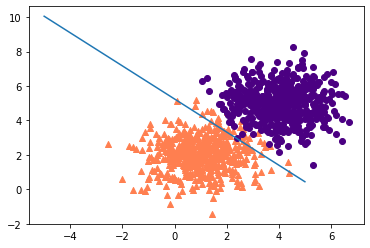

In [32]:
D = np.append(x_1,x_2,axis =0)
Data = np.concatenate((D, np.ones((2*num_points,1))),axis = 1).T
label = np.concatenate((np.ones((num_points,1)),-1*np.ones((num_points,1))),axis = 0)

learning_rate = 0.01
w = np.random.randn(1,3)
for i in range(1,1500):
    z = np.dot(w,Data)
    y_pred = prediction(w, Data)
    val = -np.multiply(label.T,z)
    J = np.sum(np.log(1+np.exp(val)))
    num = -np.multiply(label.T,np.exp(val))
    den = 1+np.exp(val)
    f = num/den
    gradJ = np.dot(Data,f.T)
    w = w - learning_rate*gradJ.T
x =  np.linspace(-5,5,100)
h_x = -(w[0,0]/w[0,1])*x - (w[0,2]/w[0,1])
plt.scatter(v_class1[:, 0], v_class1[:, 1], marker = '^', color='coral')
plt.scatter(v_class2[:, 0], v_class2[:, 1], marker = 'o', color='indigo')
plt.plot(x,h_x)
plt.show()

In [30]:
Test_predict = prediction(w, v_Data)
print("Model parameters", w)
print("Test Accuracy",np.mean(v_y[0]==Test_predict)*100)

Model parameters [[-2.02237415 -2.10564018 11.04196214]]
Test Accuracy 96.8
